In [1]:
# Data Preprocessing 
# 1) Check for Duplicate Columns
# 2) Check for Zero value or Single Value columns
# 3) Missing Values Imputation - Identify Missing Values or NAs
# a) If more than 70% of Data is missing in a Column impute with
# word 'missing' or 'notavailable'
# b) If less than 70% Data is missing and variable is
# Numeric - Mean or Median
# Categorical - Mode or Most frequenct
# Impute based on Other variables impact also then we have to use
# Algorithms for imputation
# a) Multivariate Imputation using Chained Equations (MICE) -
# Used Linear regression & Logistic regression to impute
# b) KNN based Imputation - K Nearest Neighbors Algorithm
# c) Random Forest Based imputation
# d) Probabilistic Principal Component Analysis
# 4) Outlier Detection and treatment
# a) Dependent Variable - Based on Skewness Positive or Negative
# Transformation like logarthmic transformation or Square root
# transformation for positive skewness
# Transformation like Exponential Transformation or Power
# transformtaion for negative skewness
# Capping using the lowest value or highest value or mean or median
# b) Independent Variables -
# 1) StandardScaling - Calculate Z Scores = (x-mean)/std
# 2) Normalization or Min MAx Scaling = (X-Xmin)/(Xmax-Xmin)
# 5) If data is in different mathematical units like tens, hundreds,
# thousands or lakhs then Standard Scaling must be done
# 6) Dummy Variable Encoding or Label Encoding - convert Object data
# into numbers using dummy codes.
# Gender               -  M,F,M,F,F,F,M,M,F
# Gender(LabelEncoder) -  1,0,1,0,0,0,1,1,0
# OneHotEncoding or pd.get_dummies - Create new columns & encode
# using 0/1 or No/Yes
# Gender_Male.         - 1,0,1,0,0,0,1,1,0
# Gender_Female.       - 0,1,0,1,1,1,0,0,1
# 7) Data Manipulation - Create new columns from existing columns
# 2 date columns - Age , ratio - LTI - Loan to Income (Loan, Income)
# 8) Correct Duplicate levels in the Object variables.
# Ex - Male, male, m, M - Male
# 9) Extract Data from Alpha Numeric Identifiers like Codes
# 10) Merging different datafiles into One dataframe

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import io
%cd '/Users/rajeshprabhakar/Desktop/Hackathon/BigMart Sales'

/Users/rajeshprabhakar/Desktop/Hackathon/BigMart Sales


In [4]:
bigmarttrain=pd.read_csv('train_v9rqX0R.csv')

In [5]:
bigmarttest=pd.read_csv('test_AbJTz2l.csv')

In [6]:
print(bigmarttrain.shape)
print(bigmarttest.shape)

(8523, 12)
(5681, 11)


In [7]:
bigmarttrain.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
bigmarttest.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [9]:
bigmarttrain.isnull().sum().sort_values(ascending=False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
bigmarttest.isnull().sum().sort_values(ascending=False)

Outlet_Size                  1606
Item_Weight                   976
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [11]:
# Since same columns have missing values, Combine data for 
# preprocessing
# But Test data is one column short and to concat 2 dataframes
# row wise number of columns must be equal.
bigmarttest['Item_Outlet_Sales']='test'

In [12]:
combinedf=pd.concat([bigmarttrain,bigmarttest],axis=0)
# axis=0 Row Wise Concatenation

In [13]:
combinedf.shape

(14204, 12)

In [14]:
combinedf.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales             object
dtype: object

In [15]:
combinedf.Outlet_Size.value_counts(dropna=False)

Medium    4655
NaN       4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [16]:
combinedf.Outlet_Size=combinedf.Outlet_Size.fillna('NotAvailable')

In [17]:
combinedf.Outlet_Size.value_counts(dropna=False)

Medium          4655
NotAvailable    4016
Small           3980
High            1553
Name: Outlet_Size, dtype: int64

In [18]:
combinedf.Item_Weight.describe()

count    11765.000000
mean        12.792854
std          4.652502
min          4.555000
25%          8.710000
50%         12.600000
75%         16.750000
max         21.350000
Name: Item_Weight, dtype: float64

In [19]:
combinedf.Item_Weight=combinedf.Item_Weight.fillna(
combinedf.Item_Weight.mean())

In [20]:
combinedf.Item_Weight.describe()

count    14204.000000
mean        12.792854
std          4.234226
min          4.555000
25%          9.300000
50%         12.792854
75%         16.000000
max         21.350000
Name: Item_Weight, dtype: float64

<AxesSubplot:ylabel='Frequency'>

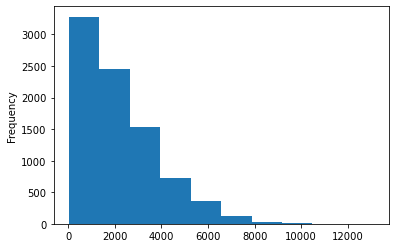

In [21]:
bigmarttrain.Item_Outlet_Sales.plot(kind='hist')

<AxesSubplot:>

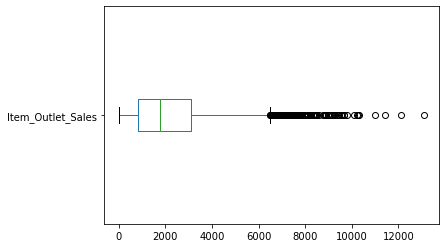

In [22]:
bigmarttrain.Item_Outlet_Sales.plot(kind='box',vert=False)

<AxesSubplot:ylabel='Density'>

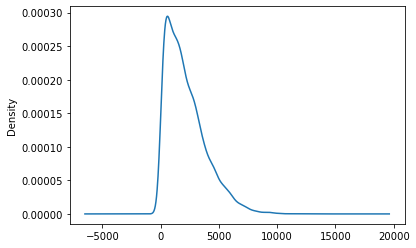

In [23]:
bigmarttrain.Item_Outlet_Sales.plot(kind='density')

In [24]:
print(bigmarttrain.Item_Outlet_Sales.skew())
print(bigmarttrain.Item_Outlet_Sales.kurt())

1.1775306028542796
1.6158766814287264


In [25]:
combinedf.Item_Visibility.describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [26]:
zerovisible=combinedf[combinedf.Item_Visibility==0]
print(zerovisible.shape)

(879, 12)


In [31]:
combinedf.Item_Fat_Content.value_counts() # Duplicate Levels

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [29]:
combinedf.Item_Fat_Content=combinedf.Item_Fat_Content.replace(
['low fat','LF'],'Low Fat')

In [30]:
combinedf.Item_Fat_Content=combinedf.Item_Fat_Content.replace(
'reg','Regular')

In [32]:
combinedf['Outlet_Age']=2020-combinedf.Outlet_Establishment_Year

In [33]:
combinedf.Outlet_Age.describe() # Age in Number of years

count    14204.000000
mean        22.169319
std          8.371664
min         11.000000
25%         16.000000
50%         21.000000
75%         33.000000
max         35.000000
Name: Outlet_Age, dtype: float64

In [34]:
combinedf.Item_Identifier.head()

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
Name: Item_Identifier, dtype: object

In [35]:
combinedf['Item_Code']=combinedf.Item_Identifier.apply(
lambda x:x[0:2])
# lambda functions are anonymous functions
# def name:
#     argumnets()
# lambda : arguments()

In [36]:
combinedf.Item_Code.value_counts()
# FD - Food Items    DR - Drinks.   NC - NonConsumables

FD    10201
NC     2686
DR     1317
Name: Item_Code, dtype: int64

In [37]:
combinedf.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Age', 'Item_Code'],
      dtype='object')

In [38]:
objectcolumns=combinedf[['Item_Fat_Content','Item_Type',
                        'Outlet_Identifier','Outlet_Size', 
                         'Outlet_Location_Type','Outlet_Type',
                        'Item_Code']]

In [40]:
numericcolumns=combinedf[['Item_Weight','Item_Visibility',
                         'Item_MRP','Item_Outlet_Sales', 
                          'Outlet_Age']]

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le=LabelEncoder()

In [44]:
objectcolumnsdummy=objectcolumns.apply(le.fit_transform)

In [45]:
objectcolumnsdummy.head()
# FatContent - Low Fat (0) & Regular (1)
# Item Code - FD(1), DR(0) & NC(2)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Code
0,0,4,9,1,0,1,1
1,1,14,3,1,2,2,0
2,0,10,9,1,0,1,1
3,1,6,0,2,2,0,1
4,0,9,1,0,2,1,2


In [46]:
combinedfclean=pd.concat([numericcolumns,objectcolumnsdummy],
                        axis=1)

In [47]:
combinedfclean.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Code
0,9.30,0.016047,249.8092,3735.138,21,0,4,9,1,0,1,1
1,5.92,0.019278,48.2692,443.4228,11,1,14,3,1,2,2,0
2,17.50,0.016760,141.6180,2097.27,21,0,10,9,1,0,1,1
3,19.20,0.000000,182.0950,732.38,22,1,6,0,2,2,0,1
4,8.93,0.000000,53.8614,994.7052,33,0,9,1,0,2,1,2


In [48]:
bigmarttraindf=combinedfclean[
    combinedfclean.Item_Outlet_Sales!='test']
bigmarttestdf=combinedfclean[
    combinedfclean.Item_Outlet_Sales=='test']

In [49]:
bigmarttestdf=bigmarttestdf.drop('Item_Outlet_Sales',axis=1)

In [50]:
print(bigmarttraindf.shape)
print(bigmarttestdf.shape)

(8523, 12)
(5681, 11)


In [58]:
bigmarttraindf.Item_Outlet_Sales=bigmarttraindf.Item_Outlet_Sales.astype('float64')

/Users/rajeshprabhakar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [59]:
# Test NUll Average Item_Outlet_Sales of different Item_Fat_Content
# is Equal
bigmarttraindf.Item_Outlet_Sales.groupby(
    bigmarttraindf.Item_Fat_Content).mean()

Item_Fat_Content
0    2157.711534
1    2224.561170
Name: Item_Outlet_Sales, dtype: float64

In [60]:
lowfat=bigmarttraindf[bigmarttraindf.Item_Fat_Content==0]
regular=bigmarttraindf[bigmarttraindf.Item_Fat_Content==1]

In [61]:
from scipy.stats import ttest_ind

In [62]:
ttest_ind(lowfat.Item_Outlet_Sales,regular.Item_Outlet_Sales,
         equal_var=False)
# Since pvalue=0.085 is greater than 0.05, Fail to Reject Null
# Null - No Significant difference in Average Item_Outlet_Sales
# of different Item_Fat_Content.

Ttest_indResult(statistic=-1.7212101304652165, pvalue=0.08526339464728244)

In [63]:
bigmarttraindf.Item_Outlet_Sales.groupby(
bigmarttraindf.Outlet_Size).mean()
# High - 0, Medium 1, Small - 3 , NotAvailable -2

Outlet_Size
0    2298.995256
1    2681.603542
2    1822.626947
3    1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [64]:
high=bigmarttraindf[bigmarttraindf.Outlet_Size==0]
medium=bigmarttraindf[bigmarttraindf.Outlet_Size==1]
notavail=bigmarttraindf[bigmarttraindf.Outlet_Size==2]
small=bigmarttraindf[bigmarttraindf.Outlet_Size==3]

In [65]:
from scipy.stats import f_oneway

In [66]:
f_oneway(high.Item_Outlet_Sales,medium.Item_Outlet_Sales,
        notavail.Item_Outlet_Sales,small.Item_Outlet_Sales)
# Since pvalue=8.228023520649935e-91 is less than 0.05, Reject Null
# Null - No Signficant difference in Average Item_Outlet_Sales of
# different Outlet_Size.

F_onewayResult(statistic=143.65746681352238, pvalue=8.228023520649935e-91)

In [67]:
# Test Null No association between Outlet_Size & Outlet_Type
pd.crosstab(bigmarttraindf.Outlet_Size,bigmarttraindf.Outlet_Type)

Outlet_Type,0,1,2,3
Outlet_Size,,,,
0,0,932,0,0
1,0,930,928,935
2,555,1855,0,0
3,528,1860,0,0


In [68]:
from scipy.stats import chi2_contingency

In [69]:
chi2_contingency(pd.crosstab(bigmarttraindf.Outlet_Size,
                            bigmarttraindf.Outlet_Type))
# Since p-value = 0.0 is less than 0.05, Reject Null

(5380.286956123781,
 0.0,
 9,
 array([[ 118.42731433,  609.85146075,  101.47788337,  102.24334155],
        [ 354.90073918, 1827.59134108,  304.10700458,  306.40091517],
        [ 306.23372052, 1576.97641675,  262.40525637,  264.38460636],
        [ 303.43822598, 1562.58078141,  260.00985568,  261.97113692]]))

In [70]:
# Machine Learning - Supervised Learning & UnSupervised Learning
# Supervised Learning - Understand Data, know variables and also
# know which algorithms to run.
# UnSupervised Learning - No understanding Data dont know variables
# and also dont know which algorithms to use.

# Supervised Learning - Regression Models, Classification Models,
# Clustering Models, Dimension Reduction Models, NLP, Image processing

# Regression Models - If dependent variable (y) is numerical,
# continuos,closer to normal distribution without missing values 
# and minmal outliers.
# Regresssion Models - Multiple Linear Regression, Decision Tree,
# Random Forest, Gradient Boosting Machines, Neural Networks,
# Support Vector Machines, etc.

# BigMartSales - Dependent Variable is Item_Outlet_Sales (y) is
# numerical, continuos, not closer to normal distribution without
# missing values & minimal outliers.

# Multiple Linear Regression explains the relationship between
# a numerical dependent variable (y) and multiple Independent
# Variables (Xs). MLR is an equation-
#   y=b0+b1X1+b2X2+b3X3+b4X4+.........+bnXn+Et
# y - Dependent Variable(must be numerical & continuos)
# b0 - intercept or Constant - point at which straight line touches
# y-axis
# b1,b2,b3,b4,....bn - Coefficients
# X1,X2,X3,X4,....Xn - Independent Variables
# Et - Error Term or Residual=ActualValue-PredictedValue

# What we have is - Data of dependent variable(y) & data of
# Independent variables (Xs)
# What we dont have - intercept+coefficients
# Matrix Formulation of MLR
# [b0,b1,b2,b3,...bn]= (X'*X)^-1*X'*y
# X' - X Transpose
# X - Independent variables matrix
# (X'*X)^-1 - Inverse of Matrix
# y - dependent variable

# Assumptions of Multiple Linear Regression (PreModel)
# 1) Linearity - There must be a logical linear relationship 
# between dependent variable(y) and Independent variables (Xs).
# Check using Correlation Matrix or Scatter Plot
# 2) Multicollinearity - There should not be multicollinearity
# among variables. Multicollinearity means strong correlation
# (>0.95) among variables or Variance Inflation Factor(VIF)>2.
# If multicollinearity is found do not include both varibles, choose
# one among them.
# 3) Exogeneity - Dependent Variable is dependent on Independent
# Variables but not vice-versa. y is dependent on Xs but Xs donot
# depend on y.
# 4) Sample Size must be minimum 20 observations per variable
# Assumptions related to Residual= Actual-Predicted (Post Model)
# 5) Residuals must be Normally Distributed. Check using QQ plot.
# 6) Residuals must be Homoscedastic. all residuals should be 
# between two paralle lines.

# Interpretation of Output
# 1) RSquare - amount variance occuring in dependent variable
# caused by independent variables or model. preferred range is
# 0.60-0.95. below 0.60 - Underfitting  & >0.95 - Overfitting
# 2) Intercept + Coefficients
# 3) Predict Function creates equation using intercept + coeffcients
# and predicts for every observation in data. (PredictedValue)
# 4) Residual=ActualValue-PredictedValue

# Diagnostic for all Regression Models
# Root Mean Square Error (RMSE)
# RMSE = sqrt(mean(residual**2))
# Model that has least RMSE is best fit Model.

In [71]:
# Split Data into depedent variable(y) & Independent variables(X)
y=bigmarttraindf.Item_Outlet_Sales
X=bigmarttraindf.drop('Item_Outlet_Sales',axis=1)

In [72]:
from sklearn.linear_model import LinearRegression # Call Function

In [73]:
reg=LinearRegression() # Shortname to Function

In [74]:
regmodel=reg.fit(X,y) # Fitting Model or Build Model

In [75]:
regmodel.score(X,y) # R Square 

0.5037944436324737

In [76]:
regmodel.intercept_

-889.9659061716034

In [77]:
print(list(zip(X.columns,regmodel.coef_)))

[('Item_Weight', -0.5610054430218198), ('Item_Visibility', -1627.9687502221257), ('Item_MRP', 15.577893892771954), ('Outlet_Age', 1.315443445514319), ('Item_Fat_Content', 54.349177940256055), ('Item_Type', -0.9336925645714871), ('Outlet_Identifier', 56.471103998783676), ('Outlet_Size', -93.01982139301337), ('Outlet_Location_Type', -122.16153062331409), ('Outlet_Type', 831.4510956704756), ('Item_Code', -18.313384731989487)]


In [78]:
# Item_Outlet_Sales= -889.96-0.561*itemweight-1627.96*itemvisible
# +15.57itemmrp+1.31*outletage+54.34*itemfat-0.933*itemtype
# +56.47*outletid-93.019*outletsize.....

In [79]:
regpredict=regmodel.predict(X) # predict

In [81]:
regresidual=y-regpredict

In [93]:
regdf=pd.DataFrame([y,regpredict,regresidual]).transpose()

In [94]:
regdf.columns=['Sales','PredictedSales','Residual']

In [100]:
regdf.head(5)

,Sales,PredictedSales,Residual
0,3735.1380,4222.440817,-487.302817
1,443.4228,1377.981065,-934.558265
2,2097.2700,2525.687010,-428.417010
3,732.3800,1564.930067,-832.550067
4,994.7052,586.050259,408.654941


In [98]:
np.sqrt(np.mean(regresidual**2)) # RMSE - 1202

1202.0195385103316